In [1]:
def is_consecutive(days):
    if days>=1 and days<=3:
        return True
    else:
        return None

def NEOC(df_hws):
    df_hws.groupby(by=['year'])['lenght'].count()
    NEOC.plot(figsize=figsize)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.ylabel('Nº eventos', fontsize=20)
    plt.xlabel('Ano', fontsize=20)
    plt.title('Número de Eventos de Ondas de Calor (NEOC)', fontsize=20)
    plt.savefig('NEOC.png')

def TDOC(df_year):    
    TDOC = df_year
    TDOC.plot(figsize=figsize)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.ylabel('Nº de dias', fontsize=20)
    plt.xlabel('Ano', fontsize=20)
    plt.title('Total de Dias em Ondas de Calor (TDOC)', fontsize=20)
    plt.savefig('TDOC.png')

def TMOC(df_hws):
    TMOC = df_hws.groupby(by=['year'])['lenght'].max()
    TMOC.plot(figsize=figsize)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20)
    plt.ylabel('Nº de dias', fontsize=20)
    plt.xlabel('Ano', fontsize=20)
    plt.title('Tamanho Máximo da Ondas de Calor (TMOC)', fontsize=20)
    plt.savefig('TMOC.png')

In [2]:
from glob import glob
import pandas as pd
import os
from datetime import timedelta
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib import rcParams
from matplotlib.path import Path
from matplotlib.patches import PathPatch

In [323]:
paths

['EHF_DATA/EHF_SANTA_VITORIA_DO_PALMAR.csv']

In [8]:
len(glob('EHF_DATA/*.csv'))

18

In [10]:
len(paths)

18

In [9]:
paths = glob('EHF_DATA/*.csv')

In [11]:
#path = paths[1]
for path in paths:
    path_out1 = 'by_severity' + os.path.basename(path)
    path_out2 = 'by_year' + os.path.basename(path)
    df_raw = pd.read_csv(path)
    try:
        df_raw.index = pd.to_datetime(df_raw.time, format='%Y-%m-%d')
    except:
        df_raw.index = pd.to_datetime(df_raw.time, format='%Y-%m-%d %H:%M:%S')
    times = df_raw.index
    heatwaves = list()
    periods = list()
    df_hws = list()
    c = 0
    for i, timenow in enumerate(times):
        if i == 0:
            heatwaves.append(timenow)
            c += 1
        else:
            days = (timenow - times[i-1]).days
            if is_consecutive(days):
                if c == 0:
                    heatwaves.append(times[i-1])
                heatwaves.append(times[i])
                c += 1
            else:         
                
                if len(heatwaves)>1:
                    periods.append(heatwaves)
                    df_hw = df_raw.loc[heatwaves[0]:heatwaves[-1]]
                    init = pd.to_datetime(df_hw['time'].values[0]) - timedelta(days=2)
                    end = pd.to_datetime(df_hw['time'].values[-1])
                    lenght = len(df_hw) + 2
                elif len(heatwaves)==1:
                    df_hw = df_raw.loc[heatwaves[0]]
                    init = pd.to_datetime(df_hw['time']) - timedelta(days=2)
                    end = pd.to_datetime(df_hw['time'])
                    lenght = 3
    
                
                
                ehf_peak = [df_hw['EHF'].max()]
                ehf_load = [df_hw['EHF'].sum()]
                ehf_mean = [df_hw['EHF'].mean()]
    
                severity_peak = [df_hw['severity'].max()]
                severity_load = [df_hw['severity'].sum()]
                severity_mean = [df_hw['severity'].mean()]
    
                df_hws.append(
    
                    pd.DataFrame({
                        'init':init, 'end':end, 'lenght':lenght, 
                        'ehf_peak':ehf_peak, 'ehf_load':ehf_load, 'ehf_mean':ehf_mean, 
                        'severity_peak':severity_peak, 'severity_load':severity_load, 'severity_mean':severity_mean,
                    })
                    
                )
                
                
                c = 0
                heatwaves = list()
    
    df_hws = pd.concat(df_hws)
    df_hws['year'] = list(map(lambda d: d.year, df_hws['init']))
    df_hws['month'] = list(map(lambda d: d.month, df_hws['init']))
    #df_hws.to_csv(path_out1)
    df_hws.to_csv(path_out1)
    print((path_out1, path_out2))

('by_severityEHF_SANTA_VITORIA_DO_PALMAR.csv', 'by_yearEHF_SANTA_VITORIA_DO_PALMAR.csv')
('by_severityEHF_CRUZ_ALTA.csv', 'by_yearEHF_CRUZ_ALTA.csv')
('by_severityEHF_MARINGA.csv', 'by_yearEHF_MARINGA.csv')
('by_severityEHF_PASSO_FUNDO.csv', 'by_yearEHF_PASSO_FUNDO.csv')
('by_severityEHF_LONDRINA.csv', 'by_yearEHF_LONDRINA.csv')
('by_severityEHF_ENCRUZILHADA_DO_SUL.csv', 'by_yearEHF_ENCRUZILHADA_DO_SUL.csv')
('by_severityEHF_BOM_JESUS.csv', 'by_yearEHF_BOM_JESUS.csv')
('by_severityEHF_SAO_LUIZ_GONZAGA.csv', 'by_yearEHF_SAO_LUIZ_GONZAGA.csv')
('by_severityEHF_CURITIBA.csv', 'by_yearEHF_CURITIBA.csv')
('by_severityEHF_TORRES.csv', 'by_yearEHF_TORRES.csv')
('by_severityEHF_CAXIAS_DO_SUL.csv', 'by_yearEHF_CAXIAS_DO_SUL.csv')
('by_severityEHF_FLORIANOPOLIS.csv', 'by_yearEHF_FLORIANOPOLIS.csv')
('by_severityEHF_URUGUAIANA.csv', 'by_yearEHF_URUGUAIANA.csv')
('by_severityEHF_SANTA_MARIA.csv', 'by_yearEHF_SANTA_MARIA.csv')
('by_severityEHF_BAGE.csv', 'by_yearEHF_BAGE.csv')
('by_severityEHF_IRAT

In [6]:
path_out2

'by_yearEHF_PORTO_ALEGRE.csv'

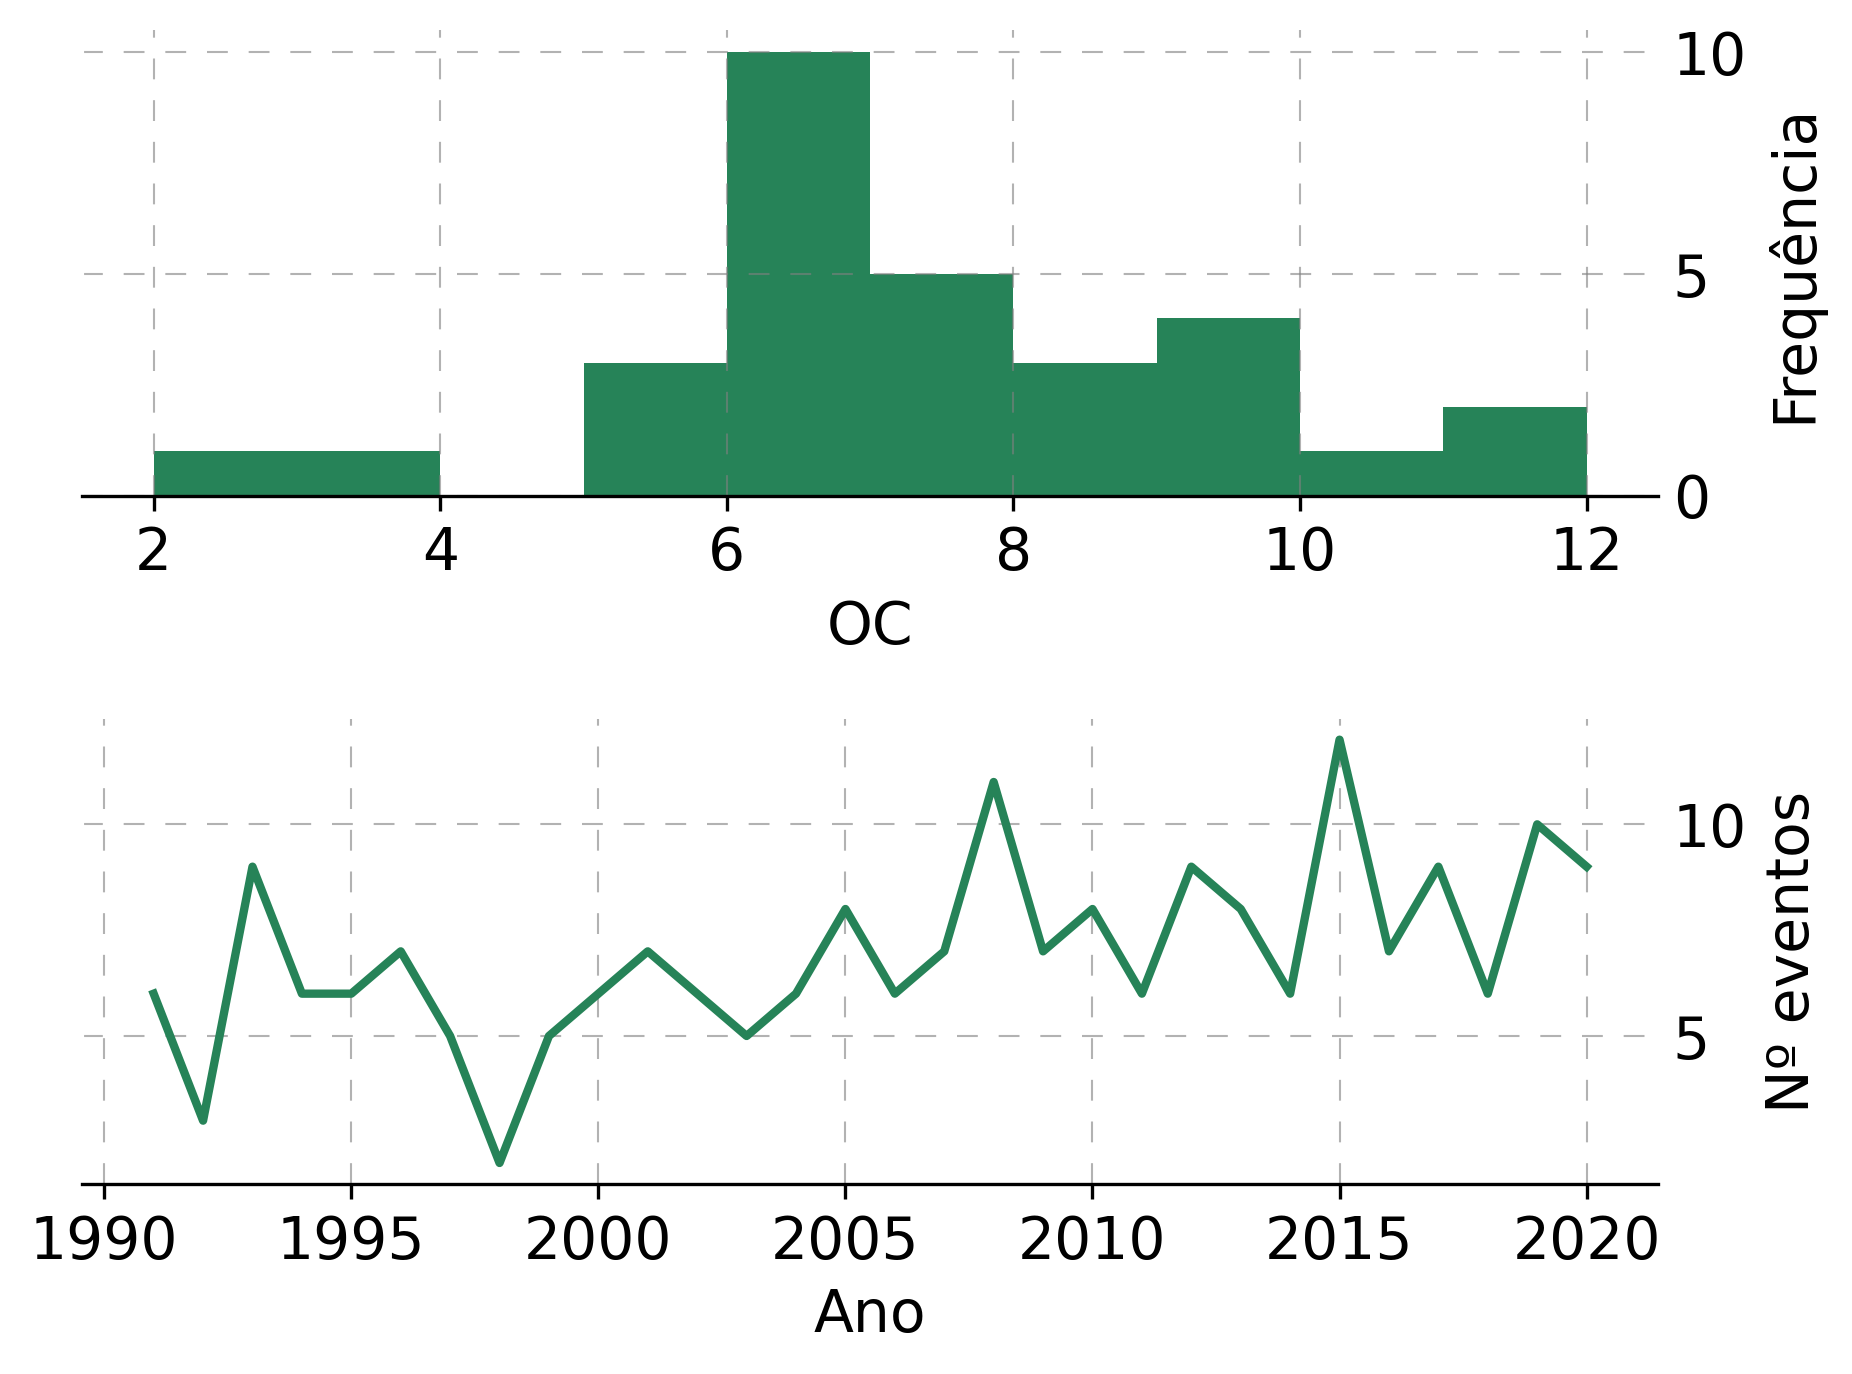

In [379]:
fig, ax = plt.subplots(2,1, dpi=300)
ax = ax.ravel()
NEOC = df_hws.groupby(by=['year'])['lenght'].count()
NEOC.hist(ax=ax[0], color='#268358', linewidth=2)
NEOC.plot(ax=ax[1], color='#268358', linewidth=2)

rcParams['font.family'] = 'DejaVu Sans'
rcParams['font.size'] = 14

# Axis Y to the right
ax[0].yaxis.tick_right()
ax[0].yaxis.set_label_position("right")
ax[0].grid(color="gray", linestyle=(0, (10, 10)), linewidth=0.5, alpha=0.6)
ax[0].tick_params(axis="x", colors="black")
ax[0].tick_params(axis="y", left=False, labelleft=False) 

# Borders
ax[0].spines["top"].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines["bottom"].set_color("black")
ax[0].spines['left'].set_color('white')
ax[0].spines['left'].set_linewidth(1)

# Remove ticks from axis Y
ax[0].tick_params(axis='y', length=0)

# Axis Y to the right
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
ax[1].grid(color="gray", linestyle=(0, (10, 10)), linewidth=0.5, alpha=0.6)
ax[1].tick_params(axis="x", colors="black")
ax[1].tick_params(axis="y", left=False, labelleft=False) 

# Borders
ax[1].spines["top"].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines["bottom"].set_color("black")
ax[1].spines['left'].set_color('white')
ax[1].spines['left'].set_linewidth(1)

# Remove ticks from axis Y
ax[1].tick_params(axis='y', length=0)

#ax[0].set_ylim(0,15)
#ax[0].set_yticks(list(range(0,15,3)))
#
ax[0].set_ylabel('Frequência')#, fontsize=20)
ax[0].set_xlabel('OC')#, fontsize=20)
#ax[1].set_ylim(0,15)
#ax[1].set_yticks(list(range(0,15,3)))

ax[1].set_ylabel('Nº eventos')#, fontsize=20)
ax[1].set_xlabel('Ano')#, fontsize=20)
plt.tight_layout()
plt.savefig('NEOC.png')

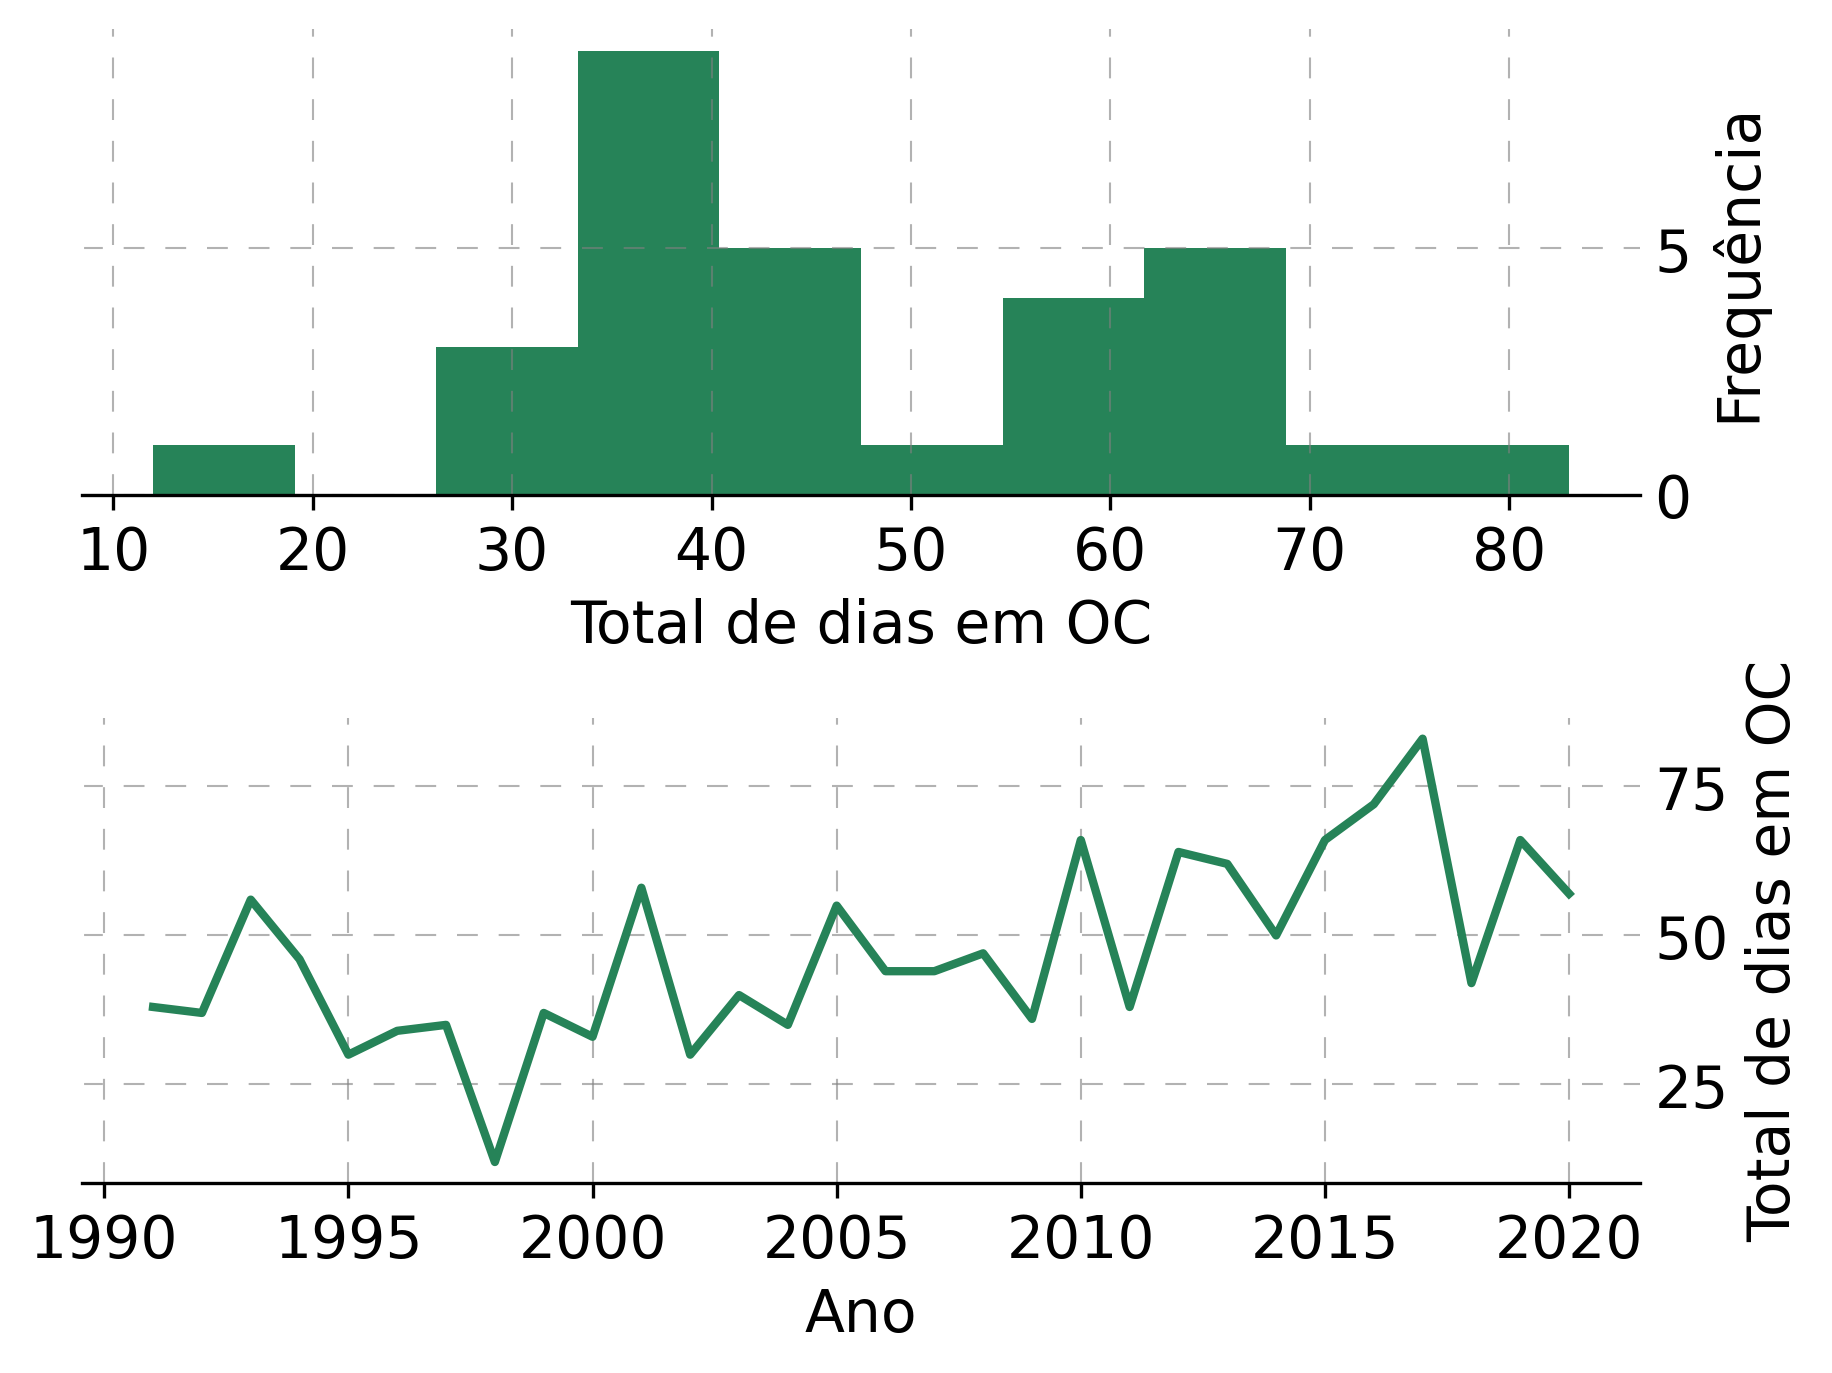

In [380]:
fig, ax = plt.subplots(2,1, dpi=300)
ax = ax.ravel()
TDOC = df_year #.plot(title='Total de Dias em Ondas de Calor (TDOC)')
TDOC.hist(ax=ax[0], color='#268358', linewidth=2)
TDOC.plot(ax=ax[1], color='#268358', linewidth=2)

rcParams['font.family'] = 'DejaVu Sans'
rcParams['font.size'] = 14

# Axis Y to the right
ax[0].yaxis.tick_right()
ax[0].yaxis.set_label_position("right")
ax[0].grid(color="gray", linestyle=(0, (10, 10)), linewidth=0.5, alpha=0.6)
ax[0].tick_params(axis="x", colors="black")
ax[0].tick_params(axis="y", left=False, labelleft=False) 

# Borders
ax[0].spines["top"].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines["bottom"].set_color("black")
ax[0].spines['left'].set_color('white')
ax[0].spines['left'].set_linewidth(1)

# Remove ticks from axis Y
ax[0].tick_params(axis='y', length=0)

# Axis Y to the right
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
ax[1].grid(color="gray", linestyle=(0, (10, 10)), linewidth=0.5, alpha=0.6)
ax[1].tick_params(axis="x", colors="black")
ax[1].tick_params(axis="y", left=False, labelleft=False) 

# Borders
ax[1].spines["top"].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines["bottom"].set_color("black")
ax[1].spines['left'].set_color('white')
ax[1].spines['left'].set_linewidth(1)

# Remove ticks from axis Y
ax[1].tick_params(axis='y', length=0)

#ax[0].set_ylim(0,15)
#ax[0].set_yticks(list(range(0,15,3)))

ax[0].set_ylabel('Frequência')#, fontsize=20)
ax[0].set_xlabel('Total de dias em OC')#, fontsize=20)
#ax[1].set_ylim(0,15)
#ax[1].set_yticks(list(range(0,15,3)))

ax[1].set_ylabel('Total de dias em OC')#, fontsize=20)
ax[1].set_xlabel('Ano')#, fontsize=20)
plt.tight_layout()

plt.savefig('TDOC.png')

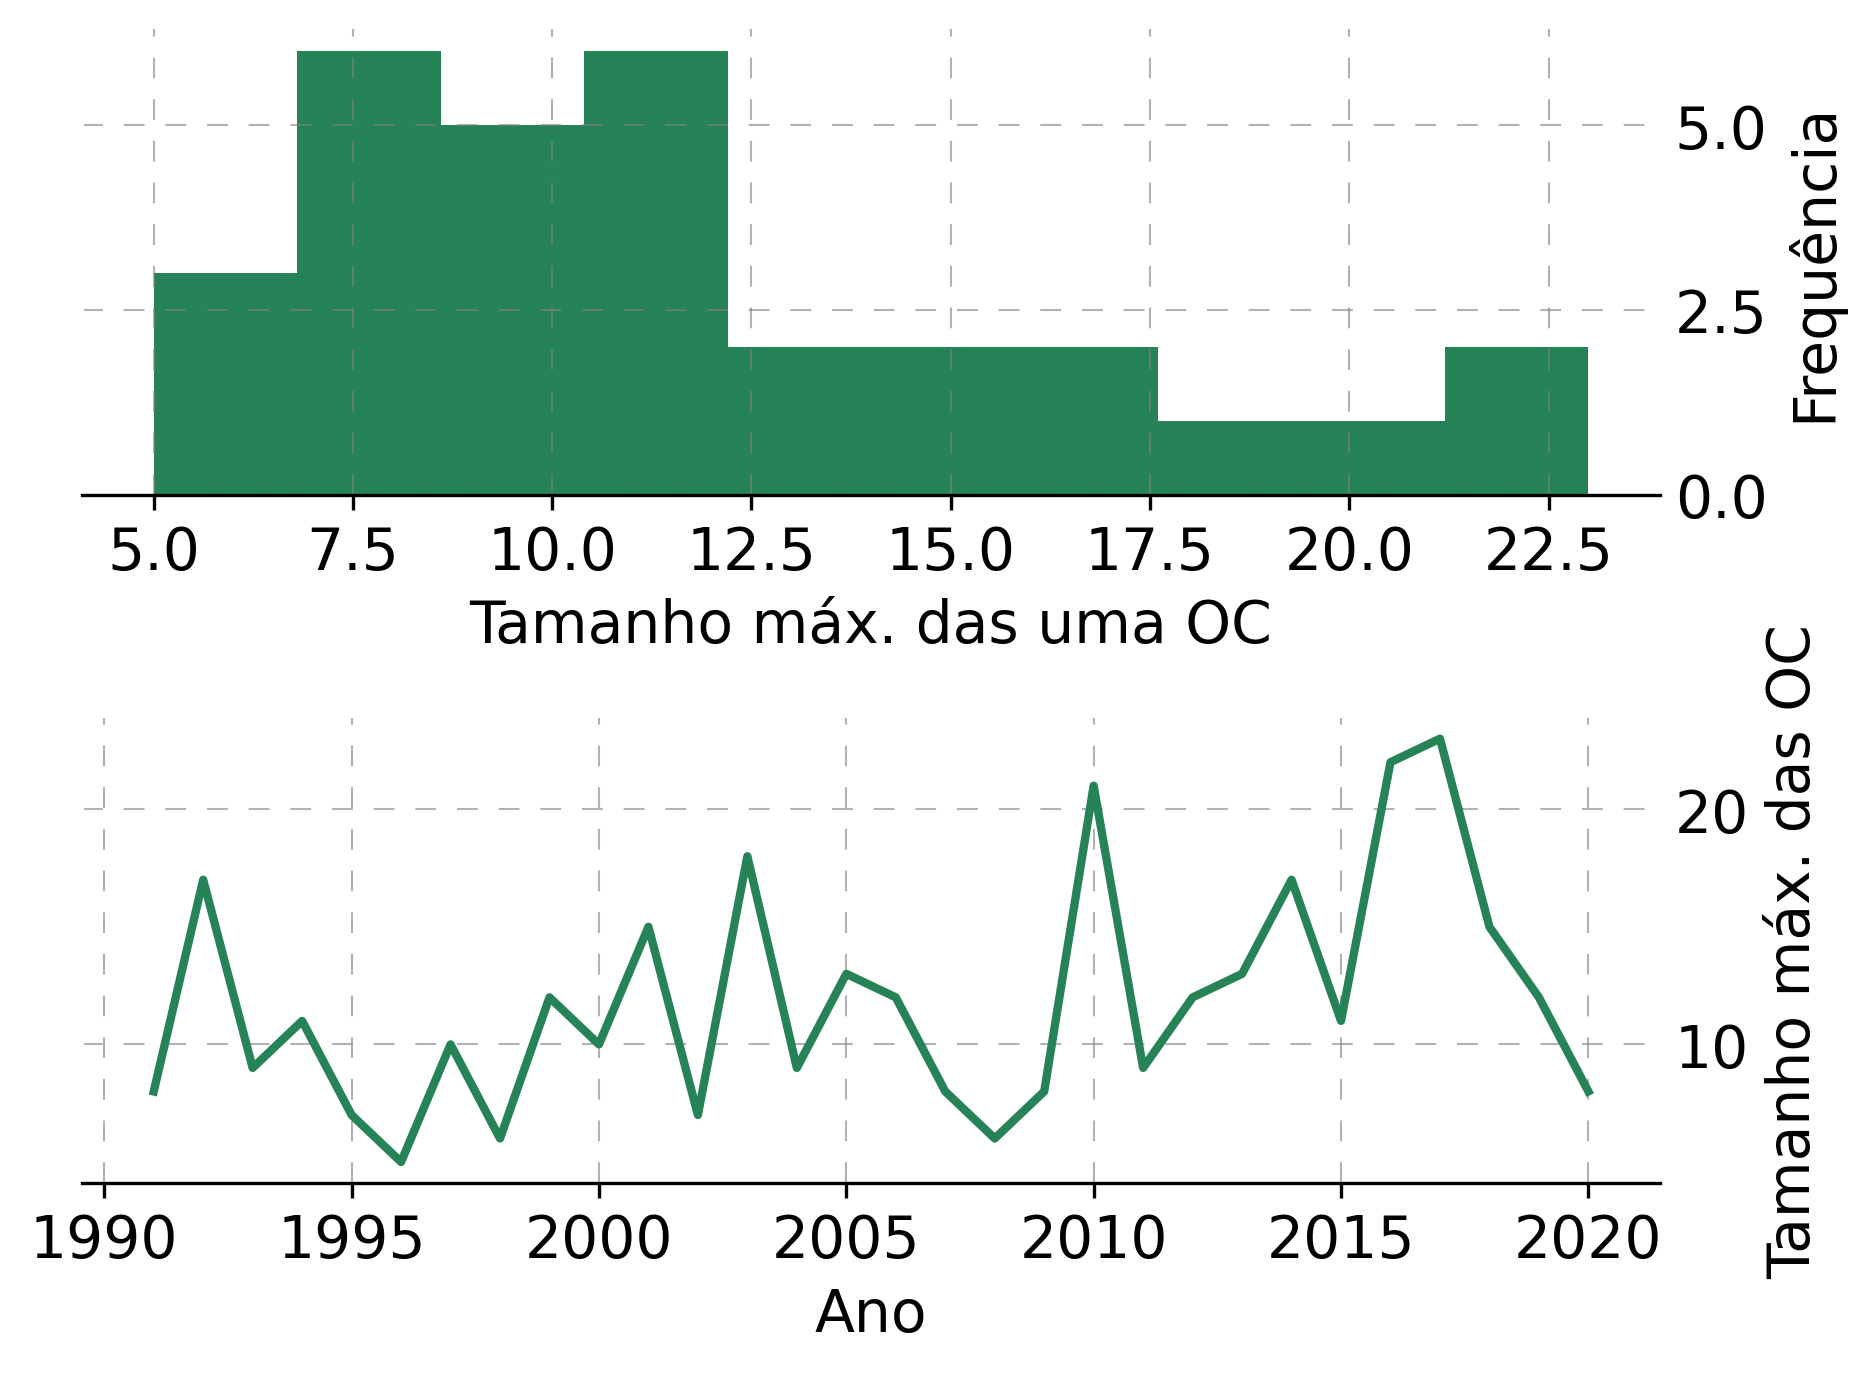

In [383]:
fig, ax = plt.subplots(2,1, dpi=300)
ax = ax.ravel()
TMOC = df_hws.groupby(by=['year'])['lenght'].max()
TMOC.hist(ax=ax[0], color='#268358', linewidth=2)
TMOC.plot(ax=ax[1], color='#268358', linewidth=2)

rcParams['font.family'] = 'DejaVu Sans'
rcParams['font.size'] = 14

# Axis Y to the right
ax[0].yaxis.tick_right()
ax[0].yaxis.set_label_position("right")
ax[0].grid(color="gray", linestyle=(0, (10, 10)), linewidth=0.5, alpha=0.6)
ax[0].tick_params(axis="x", colors="black")
ax[0].tick_params(axis="y", left=False, labelleft=False) 

# Borders
ax[0].spines["top"].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines["bottom"].set_color("black")
ax[0].spines['left'].set_color('white')
ax[0].spines['left'].set_linewidth(1)

# Remove ticks from axis Y
ax[0].tick_params(axis='y', length=0)

# Axis Y to the right
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
ax[1].grid(color="gray", linestyle=(0, (10, 10)), linewidth=0.5, alpha=0.6)
ax[1].tick_params(axis="x", colors="black")
ax[1].tick_params(axis="y", left=False, labelleft=False) 

# Borders
ax[1].spines["top"].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines["bottom"].set_color("black")
ax[1].spines['left'].set_color('white')
ax[1].spines['left'].set_linewidth(1)

# Remove ticks from axis Y
ax[1].tick_params(axis='y', length=0)

#ax[0].set_ylim(0,15)
#ax[0].set_yticks(list(range(0,15,3)))

ax[0].set_ylabel('Frequência')#, fontsize=20)
ax[0].set_xlabel('Tamanho máx. das uma OC')#, fontsize=20)
#ax[1].set_ylim(0,15)
#ax[1].set_yticks(list(range(0,15,3)))

ax[1].set_ylabel('Tamanho máx. das OC')#, fontsize=20)
ax[1].set_xlabel('Ano')#, fontsize=20)
plt.tight_layout()
plt.savefig('TMOC.png')

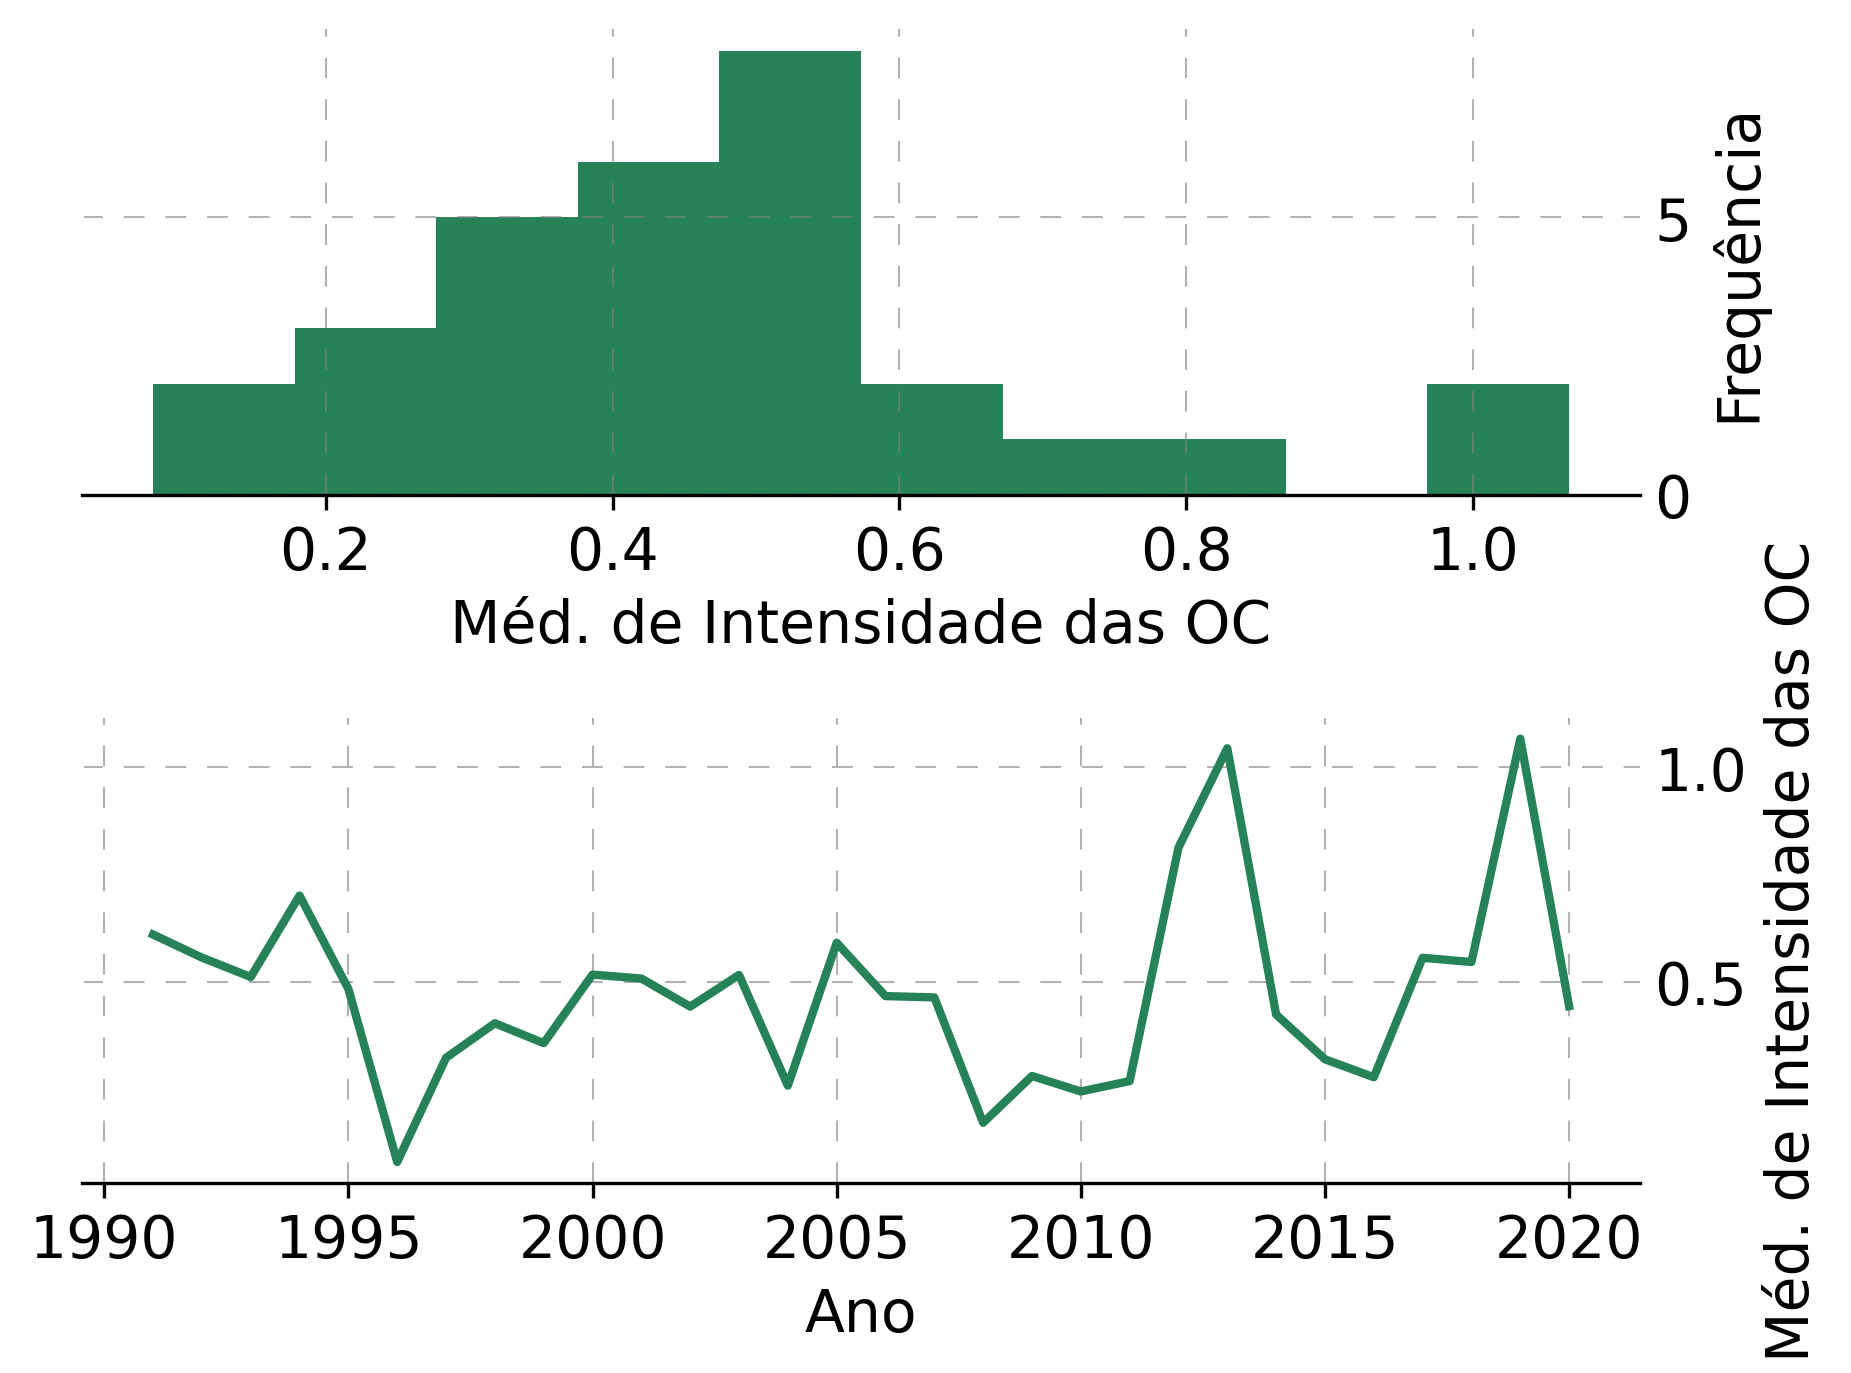

In [384]:
fig, ax = plt.subplots(2,1, dpi=300)
ax = ax.ravel()
MIOC = df_hws.groupby(by=['year'])['severity_mean'].mean()
MIOC.hist(ax=ax[0], color='#268358', linewidth=2)
MIOC.plot(ax=ax[1], color='#268358', linewidth=2)


rcParams['font.family'] = 'DejaVu Sans'
rcParams['font.size'] = 14

# Axis Y to the right
ax[0].yaxis.tick_right()
ax[0].yaxis.set_label_position("right")
ax[0].grid(color="gray", linestyle=(0, (10, 10)), linewidth=0.5, alpha=0.6)
ax[0].tick_params(axis="x", colors="black")
ax[0].tick_params(axis="y", left=False, labelleft=False) 

# Borders
ax[0].spines["top"].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines["bottom"].set_color("black")
ax[0].spines['left'].set_color('white')
ax[0].spines['left'].set_linewidth(1)

# Remove ticks from axis Y
ax[0].tick_params(axis='y', length=0)

# Axis Y to the right
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
ax[1].grid(color="gray", linestyle=(0, (10, 10)), linewidth=0.5, alpha=0.6)
ax[1].tick_params(axis="x", colors="black")
ax[1].tick_params(axis="y", left=False, labelleft=False) 

# Borders
ax[1].spines["top"].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines["bottom"].set_color("black")
ax[1].spines['left'].set_color('white')
ax[1].spines['left'].set_linewidth(1)

# Remove ticks from axis Y
ax[1].tick_params(axis='y', length=0)

#ax[0].set_ylim(0,15)
#ax[0].set_yticks(list(range(0,15,3)))

ax[0].set_ylabel('Frequência')#, fontsize=20)
ax[0].set_xlabel('Méd. de Intensidade das OC')#, fontsize=20)
#ax[1].set_ylim(0,15)
#ax[1].set_yticks(list(range(0,15,3)))

ax[1].set_ylabel('Méd. de Intensidade das OC')#, fontsize=20)
ax[1].set_xlabel('Ano')#, fontsize=20)
plt.tight_layout()
plt.savefig('MIOC.png')

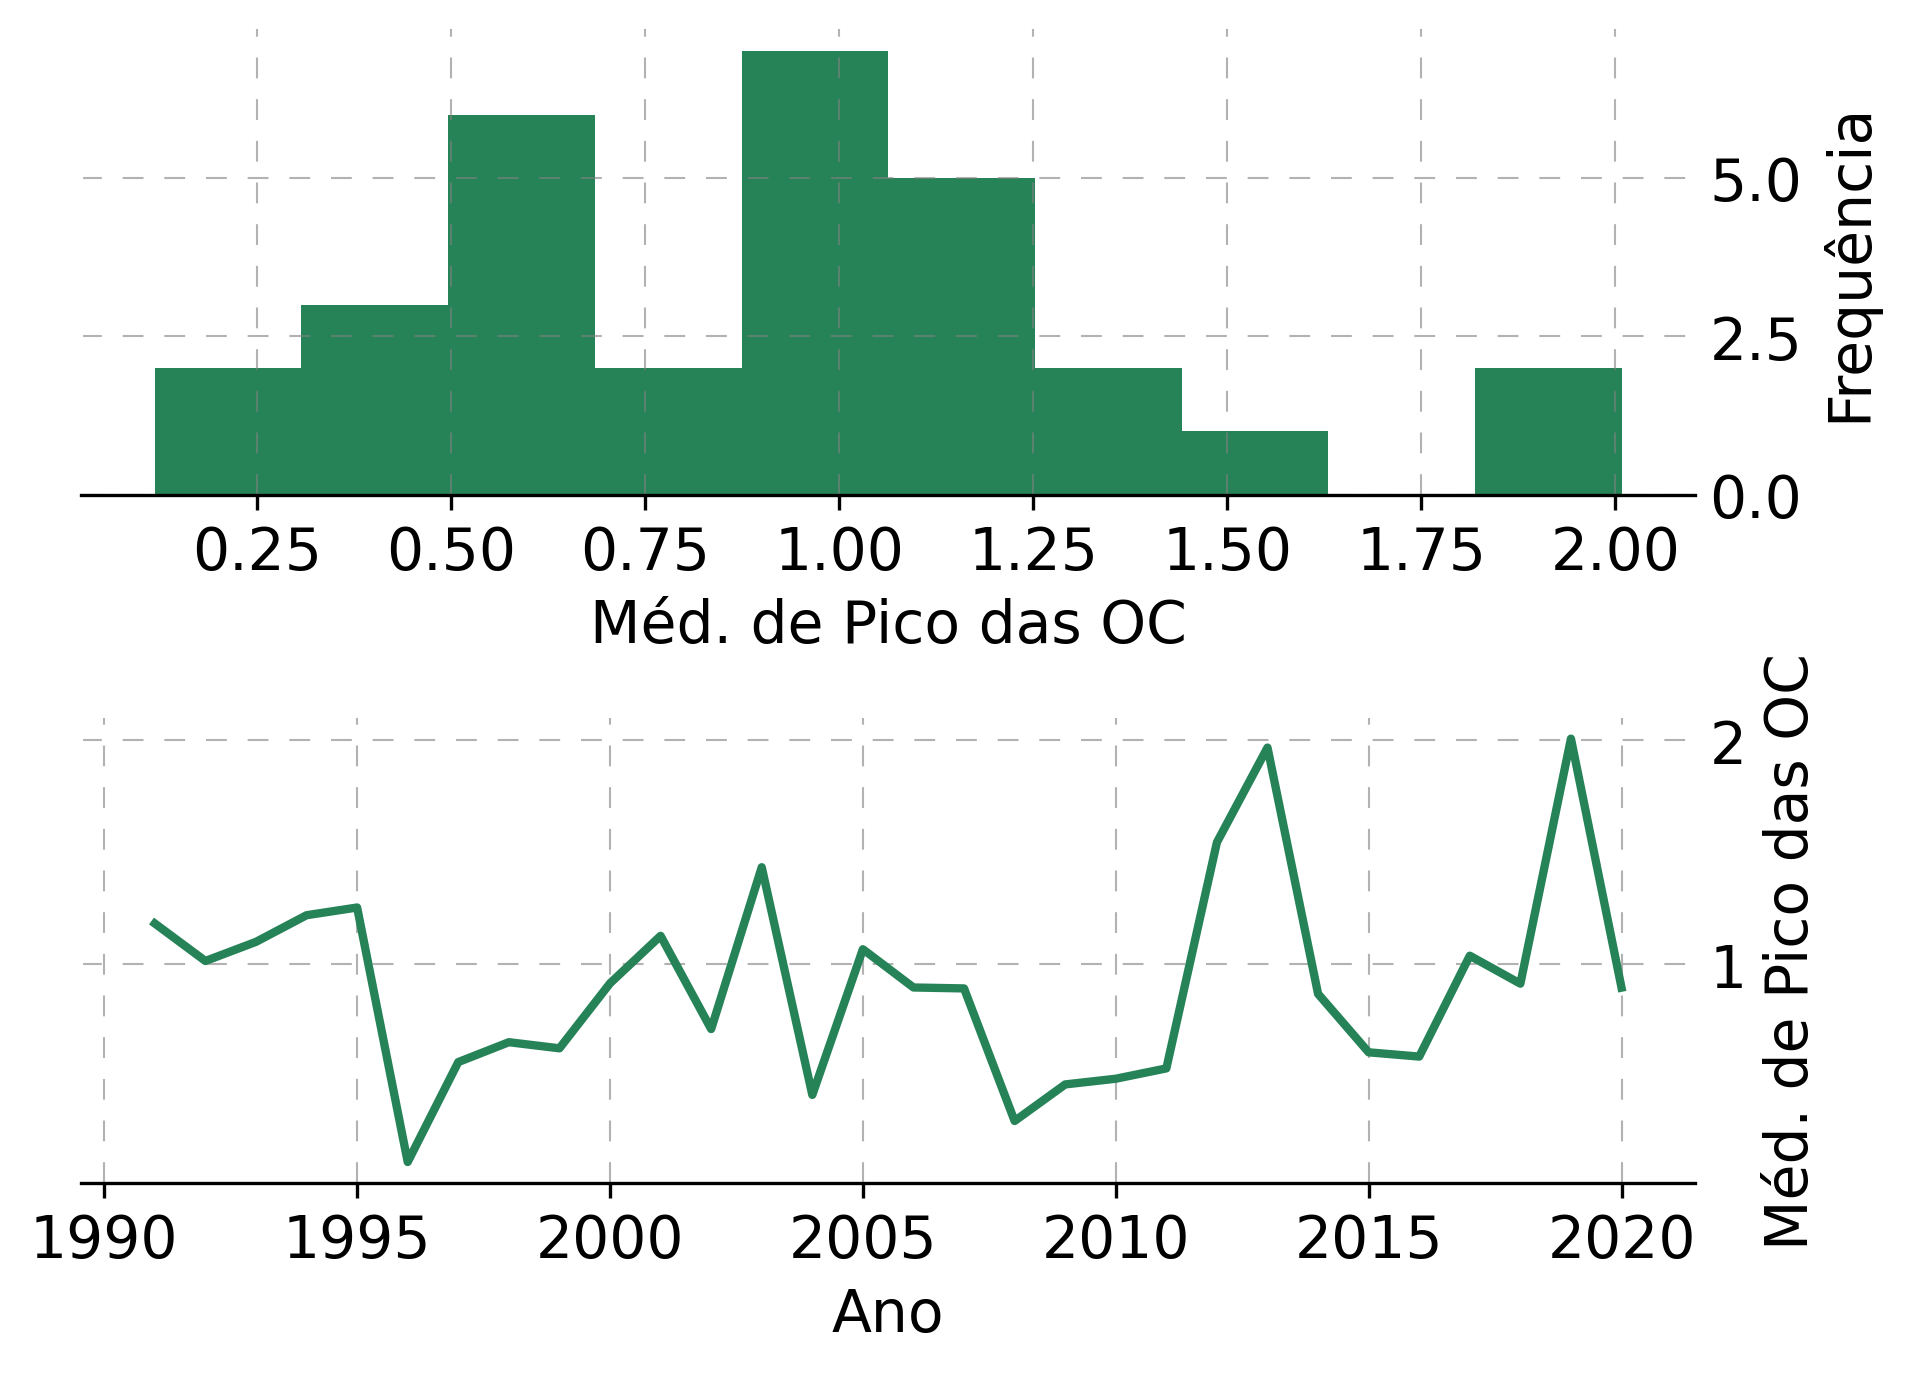

In [385]:
fig, ax = plt.subplots(2,1, dpi=300)
ax = ax.ravel()
MPOC = df_hws.groupby(by=['year'])['severity_peak'].mean()
MPOC.hist(ax=ax[0], color='#268358', linewidth=2)
MPOC.plot(ax=ax[1], color='#268358', linewidth=2)

rcParams['font.family'] = 'DejaVu Sans'
rcParams['font.size'] = 14

# Axis Y to the right
ax[0].yaxis.tick_right()
ax[0].yaxis.set_label_position("right")
ax[0].grid(color="gray", linestyle=(0, (10, 10)), linewidth=0.5, alpha=0.6)
ax[0].tick_params(axis="x", colors="black")
ax[0].tick_params(axis="y", left=False, labelleft=False) 

# Borders
ax[0].spines["top"].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines["bottom"].set_color("black")
ax[0].spines['left'].set_color('white')
ax[0].spines['left'].set_linewidth(1)

# Remove ticks from axis Y
ax[0].tick_params(axis='y', length=0)

# Axis Y to the right
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")
ax[1].grid(color="gray", linestyle=(0, (10, 10)), linewidth=0.5, alpha=0.6)
ax[1].tick_params(axis="x", colors="black")
ax[1].tick_params(axis="y", left=False, labelleft=False) 

# Borders
ax[1].spines["top"].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines["bottom"].set_color("black")
ax[1].spines['left'].set_color('white')
ax[1].spines['left'].set_linewidth(1)

# Remove ticks from axis Y
ax[1].tick_params(axis='y', length=0)

#ax[0].set_ylim(0,15)
#ax[0].set_yticks(list(range(0,15,3)))

ax[0].set_ylabel('Frequência')#, fontsize=20)
ax[0].set_xlabel('Méd. de Pico das OC')#, fontsize=20)
#ax[1].set_ylim(0,15)
#ax[1].set_yticks(list(range(0,15,3)))

ax[1].set_ylabel('Méd. de Pico das OC')#, fontsize=20)
ax[1].set_xlabel('Ano')#, fontsize=20)
plt.tight_layout()
plt.savefig('MPOC.png')

In [317]:
NEOC

year
1991     6
1992     3
1993     9
1994     6
1995     6
1996     7
1997     5
1998     2
1999     5
2000     6
2001     7
2002     6
2003     5
2004     6
2005     8
2006     6
2007     7
2008    11
2009     7
2010     8
2011     6
2012     9
2013     8
2014     6
2015    12
2016     7
2017     9
2018     6
2019    10
2020     9
Name: lenght, dtype: int64

In [318]:
TDOC

year
1991    38
1992    37
1993    56
1994    46
1995    30
1996    34
1997    35
1998    12
1999    37
2000    33
2001    58
2002    30
2003    40
2004    35
2005    55
2006    44
2007    44
2008    47
2009    36
2010    66
2011    38
2012    64
2013    62
2014    50
2015    66
2016    72
2017    83
2018    42
2019    66
2020    57
Name: lenght, dtype: int64

In [319]:
TMOC

year
1991     8
1992    17
1993     9
1994    11
1995     7
1996     5
1997    10
1998     6
1999    12
2000    10
2001    15
2002     7
2003    18
2004     9
2005    13
2006    12
2007     8
2008     6
2009     8
2010    21
2011     9
2012    12
2013    13
2014    17
2015    11
2016    22
2017    23
2018    15
2019    12
2020     8
Name: lenght, dtype: int64

In [320]:
MIOC

year
1991    0.610037
1992    0.556321
1993    0.511027
1994    0.700974
1995    0.483165
1996    0.079566
1997    0.322738
1998    0.403164
1999    0.356781
2000    0.516623
2001    0.507481
2002    0.441980
2003    0.515903
2004    0.257596
2005    0.590916
2006    0.466484
2007    0.463449
2008    0.171102
2009    0.280187
2010    0.244103
2011    0.268240
2012    0.812714
2013    1.044491
2014    0.423414
2015    0.319181
2016    0.277311
2017    0.555867
2018    0.545956
2019    1.066909
2020    0.443107
Name: severity_mean, dtype: float64

In [321]:
MPOC

year
1991    1.182682
1992    1.015240
1993    1.100695
1994    1.219648
1995    1.254148
1996    0.117739
1997    0.563924
1998    0.652672
1999    0.625354
2000    0.915573
2001    1.127631
2002    0.711289
2003    1.433943
2004    0.417349
2005    1.067772
2006    0.896960
2007    0.892813
2008    0.300746
2009    0.464143
2010    0.489521
2011    0.535746
2012    1.545074
2013    1.968118
2014    0.868489
2015    0.607473
2016    0.588438
2017    1.038819
2018    0.913969
2019    2.007976
2020    0.896267
Name: severity_peak, dtype: float64

In [322]:
path

'EHF_DATA/EHF_SANTA_VITORIA_DO_PALMAR.csv'